Prelecture HW

1)

Standard deviation measures the distribution of individual data points around the average of a population. It tells us how much the data is spread from the average. Standard error of the mean on the other hand shows the variability of the average depending on how many samples of data. The more data, the more accurate the estimate of the average is, therefore there is a smaller standard error of the mean.

Summary of Chatbot Session 1: "Here's a summary of this chatbot session:

Standard Deviation (SD):

SD measures how spread out individual data points are from the average (mean) in a data set.
A small SD means the data points are close to the mean, while a large SD means the data points are spread out.
Standard Error of the Mean (SEM):

SEM measures how precisely a sample mean estimates the true population mean.
A small SEM indicates the sample mean is a good estimate of the population mean, while a large SEM suggests more uncertainty.
SEM gets smaller as the sample size increases, because larger samples give more reliable estimates of the mean.
Simpler Explanation of Standard Deviation:

SD tells you if the numbers are close together or spread out.
It’s a way to see if the data points are similar to the average or vary a lot.
Simpler Explanation of SEM:

SEM tells you how precise the average (mean) is, based on your sample.
If SEM is small, the sample mean is likely close to the true population mean.
The more data you collect, the smaller the SEM gets, because you’re getting a better estimate.
Let me know if you'd like further details on any of these points!"

Link to Chatbot Session 1: https://chatgpt.com/share/66fb3943-d094-8008-8f63-e301888b3a07

2)

First you have to calculate the standard error of the mean, using its formula SEM = s/√n, where 's' is the sample standard deviation and 'n' is the sample size. Then you have to find the critical value z-score for a 95% confidence interval, which would be 1.96. Using the formula for confidence interval, CI= sample mean +- (z-value * SEM), we would get (sample mean −(1.96 * SEM), sample mean +(1.96×SEM)).
Using bootstrapping, it is the same thing but you create a confidence interval that covers 95% of the bootstrapped sample means, and the range is where the expected true mean would fall most of the time. 

Summary of Chatbot Session 2: "In this session, we discussed how to use the standard error of the mean (SEM) to create a 95% confidence interval, focusing on making the explanation simpler and clearer. Here's a summary of key points:

Standard Error of the Mean (SEM):

SEM measures how much sample means vary from the true population mean.
Formula:
SEM=
standard deviation/
√sample size

Using SEM to create a 95% Confidence Interval:

For a 95% confidence interval, you find the mean of your sample, then go 1.96 SEMs up and 1.96 SEMs down to create a range where the true mean likely falls 95% of the time.
Confidence Intervals for Bootstrapped Means:

In bootstrapping, you create many random samples and calculate the SEM for those sample means.
Using the same approach, you can go 1.96 SEMs above and below the bootstrapped mean to cover 95% of the bootstrapped means.
This method gives you a reliable estimate of where the true mean is expected to lie, based on bootstrapped sample data."

Link to Chatbot Session 2: https://chatgpt.com/share/66fb575b-6c08-8008-995f-23476f469a63

3)

With the bootstrap samples that we have, we need to calculate the mean for each sample. With the average of each sample we sort them from smallest to largest. With the averages sorted out, we can then find the 95% confidence interval, and to do this we can cut off the top and bottom by 2.5% because the total amount we cut off is 5% for a 95% confidence interval. Now find the mean of the 2.5% point and the mean at the 97.5% point to get the boundaries of the confidence interval-- the interval from the 2.5 percentile and 97.5 percentile of these bootstrapped means represents the 95% bootstrapped confidence interval that we are looking for. The function np.quantile() can be used to help find values at specific percentiles, in this case, the 2.5 and 97.5 percentiles.

Summary of Chatbot Session 3: "Here's a summary of our chatbot session:

Creating a 95% Bootstrapped Confidence Interval (without using standard deviation):

We discussed how to generate a 95% confidence interval using bootstrapping. This involves:
Taking multiple bootstrap samples from the original dataset.
Calculating the mean for each sample.
Sorting the bootstrapped means.
Using the 2.5th and 97.5th percentiles as the bounds of the confidence interval, which gives you the middle 95% of the distribution.
Why 2.5%?:

We explained why the 2.5th and 97.5th percentiles are used for a 95% confidence interval. Since 95% of the distribution lies in the middle, the remaining 5% is equally split between the lower and upper ends (2.5% on each side).
Using np.quantile():

We discussed how and why to use the np.quantile() function from NumPy to find specific percentiles (like the 2.5th and 97.5th percentiles) from a collection of bootstrapped sample means. This allows you to calculate the confidence interval directly from the data, without making assumptions about the distribution.
This session focused on understanding the logic of bootstrapped confidence intervals and how to implement them using Python."

Link to Chatbot Session 3: https://chatgpt.com/share/66fd86ae-0e14-8005-b50d-fba74a1bba0a

4)

After comparing the codes and how it changes to get the median instead of mean, we can see that the bootstrap_means was renamed to bootstrap_statistics to represent the median and store the median calculated from each bootstrap sample. Similarly to the mean, the lower and upper bounds of the confidence interval are calculated for bootstrap_statistics.

In [3]:
import numpy as np

# Function to compute bootstrap confidence interval
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95):
    np.random.seed(0)  # Set seed for reproducibility
    bootstrap_means = []

    # Generate bootstrap samples and calculate their means
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
        
    # Instead of the mean, generate bootstrap samples and calculate the statistic to get the median
    #for _ in range(num_bootstrap_samples):
        #bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        #bootstrap_statistics.append(statistic(bootstrap_sample))


    # Calculate the lower and upper bounds of the confidence interval
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile
    confidence_interval = np.percentile(bootstrap_means, [100 * lower_percentile, 100 * upper_percentile])
    
    # To get the median, calculate the lower and upper bounds of the confidence interval as well
    #lower_percentile = (1 - confidence_level) / 2
    #upper_percentile = 1 - lower_percentile
    #confidence_interval = np.percentile(bootstrap_statistics, [100 * lower_percentile, 100 * upper_percentile])

    return confidence_interval

# Example sample data
sample_data = [12, 15, 14, 10, 13, 18, 16, 15, 17, 14]

# Calculate 95% bootstrap confidence interval
ci = bootstrap_confidence_interval(sample_data)
print(f"95% Bootstrap Confidence Interval: {ci}")

# Calculate 95% bootstrap confidence interval for the median
#ci_median = bootstrap_confidence_interval(sample_data, statistic=np.median)
#print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")


95% Bootstrap Confidence Interval: [12.9 15.8]


In [4]:
import numpy as np

# Function to compute bootstrap confidence interval for any statistic
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95, statistic=np.median):
    np.random.seed(0)  # Set seed for reproducibility
    bootstrap_statistics = []

    # Generate bootstrap samples and calculate the statistic (median in this case)
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_statistics.append(statistic(bootstrap_sample))

    # Calculate the lower and upper bounds of the confidence interval
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile
    confidence_interval = np.percentile(bootstrap_statistics, [100 * lower_percentile, 100 * upper_percentile])

    return confidence_interval

# Example sample data
sample_data = [12, 15, 14, 10, 13, 18, 16, 15, 17, 14]

# Calculate 95% bootstrap confidence interval for the median
ci_median = bootstrap_confidence_interval(sample_data, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")


95% Bootstrap Confidence Interval for the Median: [13. 16.]


Summary of Chatbot Session 4: "In this session, we focused on creating Python code to compute bootstrap confidence intervals for population parameters.

First, I provided a Python function that calculates a 95% bootstrap confidence interval for the population mean based on a sample.
You then requested a version for a different population parameter, like the population median. I modified the code to allow any statistic (e.g., median) to be passed as a parameter.
We discussed how the change was minimal, mainly generalizing the code to work with different statistics (like np.median or np.mean), and ensuring flexibility for other possible parameters.
Overall, the session was about making the bootstrap function more adaptable while retaining the same core logic."

Link to Chatbot Session 4: https://chatgpt.com/share/66fd8fee-deac-8005-b98b-8bd14a75c760

Postlecture HW

5)

The population parameter is an unknown value that describes the characteristic of an entire population. The sample statistic is a value calculated from a sample of the population. The sample statistic is used to estimate the population parameter. The confidence interval is what tells us the range of values the population parameter might be, based on the sample statistic. This is not the true population parameter, but just an estimate. Using sample statistic to estimate the population parameter, the confidence interval helps us show how accurate the estimation is. This tells us if our conclusion is valid and if we can trust the estimate. 

Summary of Chatbot Session 5: "In this session, we discussed the distinction between population parameters and sample statistics, focusing on how this difference relates to confidence intervals. I explained that:

Population parameters represent the true values for an entire group, while sample statistics are estimates from smaller samples.
Confidence intervals provide a range of values where the population parameter likely falls, helping account for the uncertainty in using a sample statistic.
Understanding this distinction is important for making accurate decisions, handling uncertainty, trusting estimates, and drawing valid conclusions.
Finally, I provided a simplified version and emphasized why this concept matters for data analysis and inference."

Link to Chatbot Session 5: https://chatgpt.com/share/66fe9a2f-e75c-8005-ae07-046863444c2d

6.1)

In the process of bootstrapping, you start with a dataset and resample it by randomly selecting data points with replacement. This mean you can pick the data more than once. The process is repeated multiple times to make multiple bootstrap samples. 

6.2)

When unsure of the real mean in a bigger group just based off of a small sample, bootstrapping helps with understanding the possible variation. Bootstrapping estimates the accuracy and variability of a statistic. 

6.3)

If i have a sample to start off with, I can first use bootstrapping to resample the data and create many bootstrap samples. I calculate the statistics for the bootstrap samples, like the mean. With that I can compare the distribution of the mean of the bootstrap samples to my hypothesized guess of the average. If my hypothesis falls in the middle of the bootstrap distribution then I can assume that my hypothesis is plausible. 

7)

Null hypothesis is the hypothesis that there is no effect or difference. If the confidence interval overlaps zero it indicates that zero is a plausible value for the true mean. Just know that the sample mean statistic is also just another estimate of the true population mean, so theres also uncertainty. Even when the observed sample mean statistic itself is not zero, but the confidence interval includes zero, the true effect could still be zero. There's not enough evidence. 

Summary of Chatbot Session 6: "Sure! Here's a summary of our conversation:

Bootstrapping Process: We discussed the steps of bootstrapping, a method for estimating the distribution of a sample statistic by repeatedly resampling with replacement from the original data. It involves generating many bootstrap samples, calculating the statistic for each, and using the resulting distribution to estimate confidence intervals or standard errors.

Bootstrapping to Assess Hypotheses: You asked how to use bootstrapping to assess whether a hypothesized population mean is plausible. The process involves comparing the hypothesized value (e.g., no effect) to the distribution of sample means generated from bootstrapping. If the hypothesized value falls within the range of plausible means, the hypothesis may be plausible.

Hypothesis Testing and Confidence Intervals: We explored why a confidence interval overlapping zero leads to "failing to reject the null hypothesis" (the hypothesis of no effect), even if the observed sample mean isn’t zero. The key reason is that the confidence interval reflects uncertainty in the sample data. If zero is within this interval, it's still possible the true effect is zero, so there's not enough evidence to reject the null hypothesis, despite the sample mean showing a small effect.

Let me know if you'd like to dive deeper into any part!"

Link to Chatbot Session 6: https://chatgpt.com/share/66fed73b-3860-8005-a288-dc3709f17900

8)

Mean of Final Health Scores (Bootstrap): 84.32
95% Confidence Interval: (83.00, 85.40)


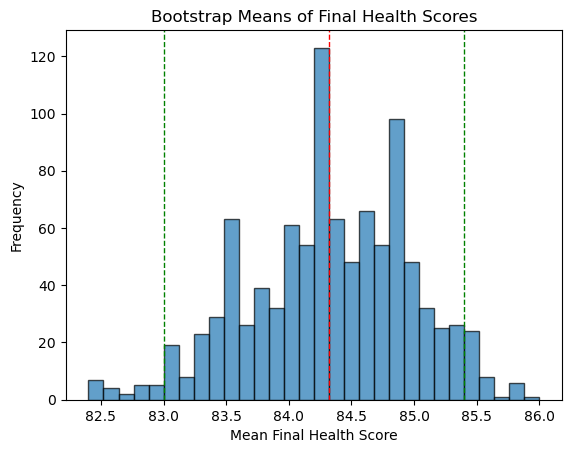

            Age  InitialHealthScore  FinalHealthScore
count  10.00000           10.000000         10.000000
mean   38.40000           81.000000         84.300000
std     8.30261            2.828427          2.110819
min    26.00000           76.000000         80.000000
25%    33.25000           79.250000         83.250000
50%    38.00000           81.000000         85.000000
75%    44.00000           83.000000         86.000000
max    52.00000           85.000000         86.000000


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

from io import StringIO
df = pd.read_csv(StringIO(data))

np.random.seed(42)

# Function to perform bootstrapping
def bootstrap_means(data, n_iterations):
    means = []
    for _ in range(n_iterations):
        # Sample with replacement
        sample = data.sample(n=len(data), replace=True)
        # Calculate mean of FinalHealthScore
        means.append(sample['FinalHealthScore'].mean())
    return means

# Set the number of bootstrap samples
n_iterations = 1000

# Get bootstrap means
bootstraped_means = bootstrap_means(df, n_iterations)

# Calculate the mean and 95% confidence interval
mean = np.mean(bootstraped_means)
ci_lower = np.percentile(bootstraped_means, 2.5)
ci_upper = np.percentile(bootstraped_means, 97.5)

# Display results
print(f"Mean of Final Health Scores (Bootstrap): {mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Plot the distribution of bootstrap means
plt.hist(bootstraped_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(ci_lower, color='green', linestyle='dashed', linewidth=1)
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=1)
plt.title('Bootstrap Means of Final Health Scores')
plt.xlabel('Mean Final Health Score')
plt.ylabel('Frequency')
plt.show()

from io import StringIO
df = pd.read_csv(StringIO(data))

# Summary statistics
summary_stats = df[['Age', 'InitialHealthScore', 'FinalHealthScore']].describe()
print(summary_stats)

The given vaccine dataset includes information about the patient number, age, gender, initial health score, and final healthscore. The main focus of this dataset would be questioning the change from initial health score to final healthscore, what kind of impact the vaccine had on the health of the patients. In the context of this dataset, the meaning of a Null Hypothesis of "no effect" would show that the vaccine did not result in any significant change in the health score of the patients. Through the use of the bootstrapping method, I was able to get the mean of the final health score and the 95% confidence interval of the data. First sampling the data with replacement, getting the mean of all the bootstrap samples, and calculating the mean and 95% confidence interval. The purpose of using the bootstrapping method is to obtain an estimate of the distribution of the average, even with the small sample size given. It estimates the accuracy and variability of a statistic. This can be visualized in the histogram above, where the confidence interval i clearly labelled, along with the mean of final health scores. To conclude the data regarding the Null Hypothesis of "no effect", the mean of the initial health score is 81, but the 95% confidence interval only ranges from 83 to 85.4. This illustrates that the Null Hypothesis would be rejected because the confidence interval indicates that the vaccine likely had a positive impact on patients' health. 

Summary of Chatbot Session 7: "Sure! Here’s a summary of our chatbot session:

1. **Vaccine Dataset Analysis**:
   - You provided a dataset containing patient health scores before and after receiving a vaccine.
   - We discussed how to calculate summary statistics (mean, median, standard deviation, etc.) for the dataset.

2. **Null Hypothesis of "No Effect"**:
   - We explained the concept of a Null Hypothesis in the context of the dataset, stating that there is no significant difference between the Initial and Final Health Scores.
   - We discussed how to test this hypothesis using statistical methods such as a paired t-test or bootstrapping.

3. **Bootstrapping Method**:
   - You performed a bootstrapping analysis to estimate the mean and confidence intervals for the Final Health Scores.
   - We examined how the results of the bootstrapping could inform conclusions about the effectiveness of the vaccine.

4. **Reproducibility with `np.random.seed()`**:
   - We covered how to ensure your analysis is reproducible by using `np.random.seed()` in your code.
   - This allows anyone running the code to obtain the same results, enhancing transparency in your analysis.

5. **Creating and Reading a CSV File**:
   - We discussed how to create a CSV file using pandas and how to read that file back into your Python code.
   - A complete code example was provided to demonstrate the process from creating the DataFrame to performing bootstrapping analysis after reading the CSV.

Overall, the session focused on statistical analysis of vaccine effectiveness using your dataset, emphasizing reproducibility and best practices in data analysis. If you have any other questions or need further assistance, feel free to ask!"

Link to Chatbot Session 7: https://chatgpt.com/share/66fee781-d6d4-8005-bd37-28ed55b2e9d4

9) Somewhat